In [ ]:
!pip install konlpy
!pip install mecab-python

In [ ]:
!pip install transformers

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [5]:
# !curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash

In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab, Kkma, Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [7]:
from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [8]:
data_csv = pd.read_csv("/content/drive/MyDrive/KT_AIVLE/빅프로젝트/qna.csv")

In [9]:
display(data_csv)

,대분류,질문
0,계약이행,계약 이행에 관한 내용을 확인할 수 있는 문서를 작성하고 싶어
1,계약이행,계약 조건 및 의무의 이행 내용을 증명하는 문서를 작성하고자 합니다.
2,계약이행,계약 이행에 대한 내용을 명시한 문서를 작성하고 싶어요
3,계약이행,계약이 이행되었음을 입증할 수 있는 문서를 작성하고자 해요.
4,계약이행,계약이 완수되었는지에 대한 내용을 증명할 수 있는 문서를 작성하고 싶습니다.
...,...,...
1157,통지,통지를 작성할 때 어떤 예상되는 이슈에 대비했나요?
1158,통지,통지를 작성하기 위해 어떤 내용을 검증했나요?
1159,통지,통지를 작성하면서 어떤 법적 제약사항이나 규정을 고려했나요?
1160,통지,통지를 작성할 때 어떤 편집 작업을 거쳤나요?


In [10]:
data_temp = data_csv.copy(deep=True)
data_temp['label'] = data_temp['대분류']
display(data_temp)

,대분류,질문,label
0,계약이행,계약 이행에 관한 내용을 확인할 수 있는 문서를 작성하고 싶어,계약이행
1,계약이행,계약 조건 및 의무의 이행 내용을 증명하는 문서를 작성하고자 합니다.,계약이행
2,계약이행,계약 이행에 대한 내용을 명시한 문서를 작성하고 싶어요,계약이행
3,계약이행,계약이 이행되었음을 입증할 수 있는 문서를 작성하고자 해요.,계약이행
4,계약이행,계약이 완수되었는지에 대한 내용을 증명할 수 있는 문서를 작성하고 싶습니다.,계약이행
...,...,...,...
1157,통지,통지를 작성할 때 어떤 예상되는 이슈에 대비했나요?,통지
1158,통지,통지를 작성하기 위해 어떤 내용을 검증했나요?,통지
1159,통지,통지를 작성하면서 어떤 법적 제약사항이나 규정을 고려했나요?,통지
1160,통지,통지를 작성할 때 어떤 편집 작업을 거쳤나요?,통지


In [11]:
data_temp['label'].replace({'계약이행':'0', '매매':'1', '명예훼손':'2', '부동산':'3', '손해배상':'4', '용역':'5', '채무':'6', '통지':'7'}, inplace=True)
data_temp

,대분류,질문,label
0,계약이행,계약 이행에 관한 내용을 확인할 수 있는 문서를 작성하고 싶어,0
1,계약이행,계약 조건 및 의무의 이행 내용을 증명하는 문서를 작성하고자 합니다.,0
2,계약이행,계약 이행에 대한 내용을 명시한 문서를 작성하고 싶어요,0
3,계약이행,계약이 이행되었음을 입증할 수 있는 문서를 작성하고자 해요.,0
4,계약이행,계약이 완수되었는지에 대한 내용을 증명할 수 있는 문서를 작성하고 싶습니다.,0
...,...,...,...
1157,통지,통지를 작성할 때 어떤 예상되는 이슈에 대비했나요?,7
1158,통지,통지를 작성하기 위해 어떤 내용을 검증했나요?,7
1159,통지,통지를 작성하면서 어떤 법적 제약사항이나 규정을 고려했나요?,7
1160,통지,통지를 작성할 때 어떤 편집 작업을 거쳤나요?,7


In [12]:
train_data, test_data = train_test_split(data_temp, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 871
테스트용 리뷰의 개수 : 291


<Axes: >

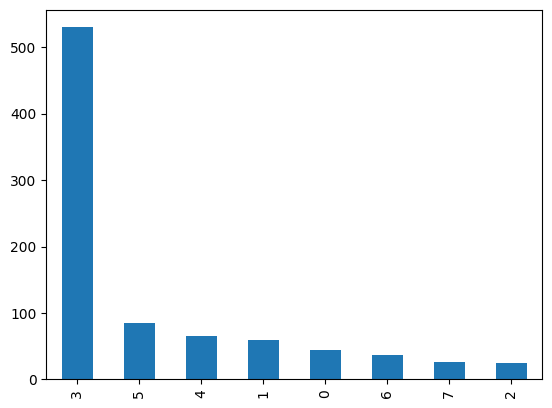

In [13]:
train_data['label'].value_counts().plot(kind = 'bar')

In [14]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

  label  count
0     0     45
1     1     59
2     2     25
3     3    530
4     4     65
5     5     85
6     6     36
7     7     26


In [15]:
# 정규표현식 사용하여 한글 제외하고 모두 제거(train)

train_data['질문'] = train_data['질문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['질문'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

대분류      0
질문       0
label    0
dtype: int64


<ipython-input-15-085ab0bdbfc3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['질문'] = train_data['질문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [16]:
# 정규표현식 사용하여 한글 제외하고 모두 제거(test)

test_data.drop_duplicates(subset = ['질문'], inplace=True) # 중복 제거
test_data['질문'] = test_data['질문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['질문'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 285


<ipython-input-16-ccb3574ff0b3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['질문'] = test_data['질문'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [17]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [18]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [19]:
train_data['tokenized'] = train_data['질문'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [20]:
test_data['tokenized'] = test_data['질문'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [21]:
train_data.head(100)

,대분류,질문,label,tokenized
649,부동산,임대한 주택에서는 취사 시설이 정상적으로 작동하지 않아 음식을 준비하기 어려운 상황...,3,"[임대, 주택, 에서, 취사, 시설, 정상, 적, 으로, 작동, 않, 아, 음식, ..."
215,부동산,임대차 계약 갱신을 위한 조건 변경을 요청하기 위해 내용증명서를 작성하려고 합니다,3,"[임대차, 계약, 갱신, 위한, 조건, 변경, 요청, 기, 위해, 내용, 증명서, ..."
850,부동산,임대차 계약이 묵시적으로 갱신되었으나 저는 계약을 해지하고 싶습니다,3,"[임대차, 계약, 묵시, 적, 으로, 갱신, 되, 었, 으나, 저, 계약, 해지, ..."
494,부동산,내용증명서를 작성한 후 제출하는 방법은 어떻게 되나요,3,"[내용, 증명서, 작성, 후, 제출, 방법, 어떻게, 되, 나요]"
1120,채무,채무자의 채무금 지불 능력을 판단하기 위해 어떤 요소들을 고려해야 할까요,6,"[채무자, 채무, 금, 불, 능력, 판단, 기, 위해, 어떤, 요소, 고려, 해야,..."
...,...,...,...,...
745,부동산,임대차 계약 갱신을 위해 계약 기간 연장 및 주택 인테리어 조정에 관한 내용증명을 ...,3,"[임대차, 계약, 갱신, 위해, 계약, 기간, 연장, 및, 주택, 인테리어, 조정,..."
991,용역,용역대금 미지급으로 인한 분쟁을 법적으로 해결하기 위해 선택할 수 있는 다양한 방법...,5,"[용역, 대금, 미지급, 으로, 인한, 분쟁, 법, 적, 으로, 해결, 기, 위해,..."
65,매매,지난 주 동안 매매 거래를 진행했는데 이에 대한 내용증명서를 작성하고 싶습니다 거래...,1,"[지난, 주, 동안, 매매, 거래, 진행, 했, 는데, 대한, 내용, 증명서, 작성..."
755,부동산,저희는 주택 임대차 계약 갱신을 요청하며 월세 인상 및 주택 시설 개선에 대한 내용...,3,"[저희, 주택, 임대차, 계약, 갱신, 요청, 며, 월세, 인상, 및, 주택, 시설..."


In [22]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [23]:
X_train[0]

['임대',
 '주택',
 '에서',
 '취사',
 '시설',
 '정상',
 '적',
 '으로',
 '작동',
 '않',
 '아',
 '음식',
 '준비',
 '기',
 '어려운',
 '상황',
 '입니다',
 '보증금',
 '월세',
 '감액',
 '해',
 '주',
 '시',
 '기',
 '부탁드립니다']

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

#  Tokenizer 객체 저장
# with open('tokenizer.pkl', 'wb') as f:
#     pickle.dump(tokenizer, f)

# Tokenizer 객체 로드
# with open('tokenizer.pkl', 'rb') as f:
#     tokenizer = pickle.load(f)


In [25]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1000
등장 빈도가 1번 이하인 희귀 단어의 수: 364
단어 집합에서 희귀 단어의 비율: 36.4
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.7008978259256513


In [26]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 638


In [27]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

리뷰의 최대 길이 : 38
리뷰의 평균 길이 : 15.473019517795636


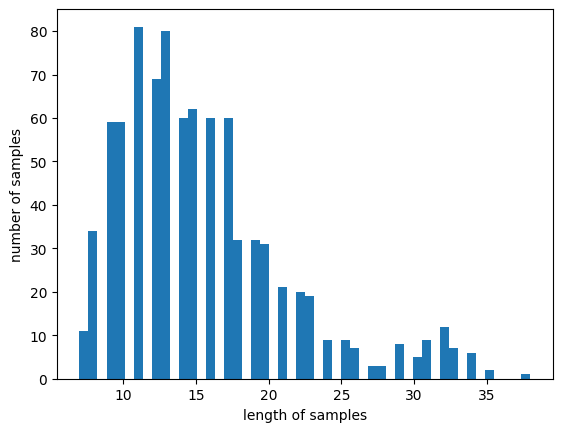

In [28]:
print('리뷰의 최대 길이 :',max(len(질문) for 질문 in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(질문) for 질문 in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [30]:
max_len = 33
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 33 이하인 샘플의 비율: 98.96670493685419


In [31]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [32]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Multi-Kernel 1D CNN

In [33]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import load_model

embedding_dim = 128
dropout_ratio = (0.5, 0.8)
num_filters = 128
hidden_units = 128

In [34]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_ratio[0])(z)

In [35]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

In [ ]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z)
z = Dense(hidden_units, activation="relu")(z)
model_output = Dense(8, activation="softmax")(z)

model = Model(model_input, model_output)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split=0.2, verbose=2, callbacks=[es, mc])

In [37]:
loaded_model = load_model('CNN_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

9/9 [==============================] - 0s 17ms/step - loss: 0.0201 - acc: 0.9860

 테스트 정확도: 0.9860


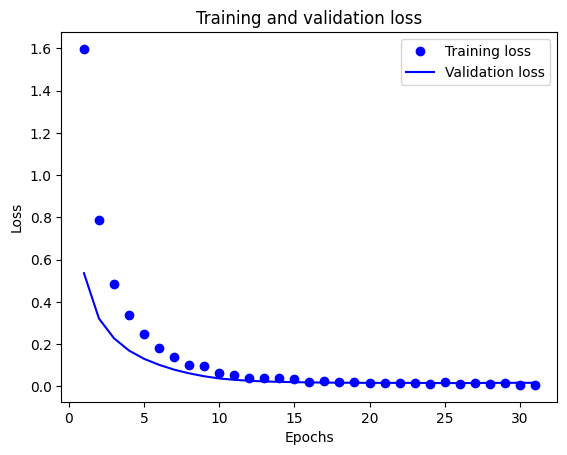

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

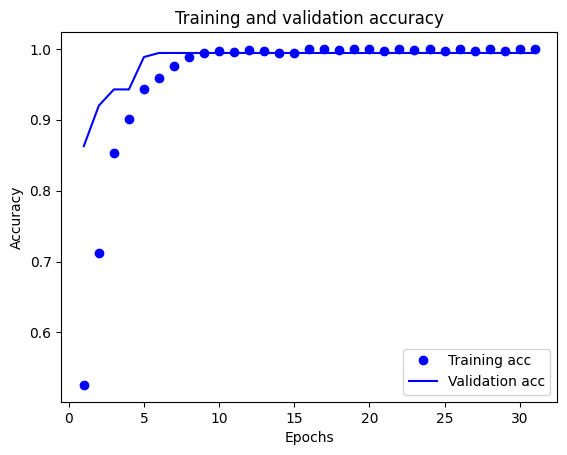

In [48]:
plt.clf() #그래프를 초기화합니다.

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [49]:
def sentiment_predict(new_sentence): # data pipeline input
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)


  score = loaded_model.predict(pad_new)  # 예측 output
  test = np.argsort(score)
  temp = test[0][::-1]
  test = test + 1
  temp = test[0][::-1]
  print(temp)
  max_index = np.argmax(score)+1  # 최댓값을 가지는 인덱스를 찾습니다.
  print(max_index)
  if max_index == 1:
    print('계약이행')
  elif max_index == 2:
    print('매매')
  elif max_index == 3:
    print('명예훼손')
  elif max_index == 4:
    print('부동산')
  elif max_index == 5:
    print('손해배상')
  elif max_index == 6:
    print('용역')
  elif max_index == 7:
    print('채무')
  elif max_index == 8:
    print('통지')

In [50]:
sentiment_predict('제가 계약을 통해서 일을 받았는데 용역대금을 그 돈을 제대로 안줘요. 어떤 조치를 취해야 하나요?')
sentiment_predict('채무자가 제 돈을 변제할 생각이 없어요. 어떻게 해야할까요?')
sentiment_predict('계약 조건 및 의무의 이행 내용을 증명하는 문서를 작성할려고하는데 어떤게 있어??')
sentiment_predict('세입자가 보증금을 믿고 월세를 제대로 안주고 있어요. 방법이 없을까요?')
sentiment_predict('관리비 납부 요구를 목적으로 하는 경고 내용 증명을 작성하고 싶습니다')
sentiment_predict('어떤 사람이 저를 다치게 했어요 제가 입은 손해를 보상받고 싶은데 어떤 방법이 있을까요?')
sentiment_predict('월세를 빼서 집 주인이 보증금을 줘야하는데 안줘요. 어떻게 해야할까요')
sentiment_predict('지난 주 동안 부동산 매매 거래를 진행했는데 이에 대한 내용증명서를 작성하고 싶습니다')
sentiment_predict('작년에 도난 사건으로 손해를 입었습니다. 경찰서에서 연락이 왔어요 정신적 손해배상과 손해배상청구소송 하려고 합니다')
sentiment_predict('전세계약 기간이 끝났는데 집주인이 보증금을 못주겠다고 버텨요. 어떤 조취를 취해야할까요? 알려주세요.')
sentiment_predict('법원에서 온 통지 내용을 이행하지 않으면 어떻게 돼? ')

1/1 [==============================] - 0s 24ms/step
[6 2 8 7 1 4 5 3]
6
용역
1/1 [==============================] - 0s 23ms/step
[7 8 5 3 2 6 1 4]
7
채무
1/1 [==============================] - 0s 22ms/step
[1 4 2 3 8 7 5 6]
1
계약이행
1/1 [==============================] - 0s 23ms/step
[4 8 1 3 7 2 5 6]
4
부동산
1/1 [==============================] - 0s 27ms/step
[4 1 8 3 2 7 6 5]
4
부동산
1/1 [==============================] - 0s 23ms/step
[5 7 1 3 2 8 6 4]
5
손해배상
1/1 [==============================] - 0s 28ms/step
[4 8 7 1 3 6 5 2]
4
부동산
1/1 [==============================] - 0s 29ms/step
[2 1 3 7 5 6 8 4]
2
매매
1/1 [==============================] - 0s 23ms/step
[5 1 7 2 3 6 8 4]
5
손해배상
1/1 [==============================] - 0s 31ms/step
[4 1 8 7 5 3 6 2]
4
부동산
1/1 [==============================] - 0s 25ms/step
[8 7 3 1 6 5 2 4]
8
통지


In [51]:
new_model = load_model('CNN_model.h5')
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 33)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 33, 128)      81664       ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 33, 128)      0           ['embedding[0][0]']              
                                                                                                  
 conv1d (Conv1D)                (None, 31, 128)      49280       ['dropout[0][0]']                
                                                                                            

In [52]:
import tensorflow as tf

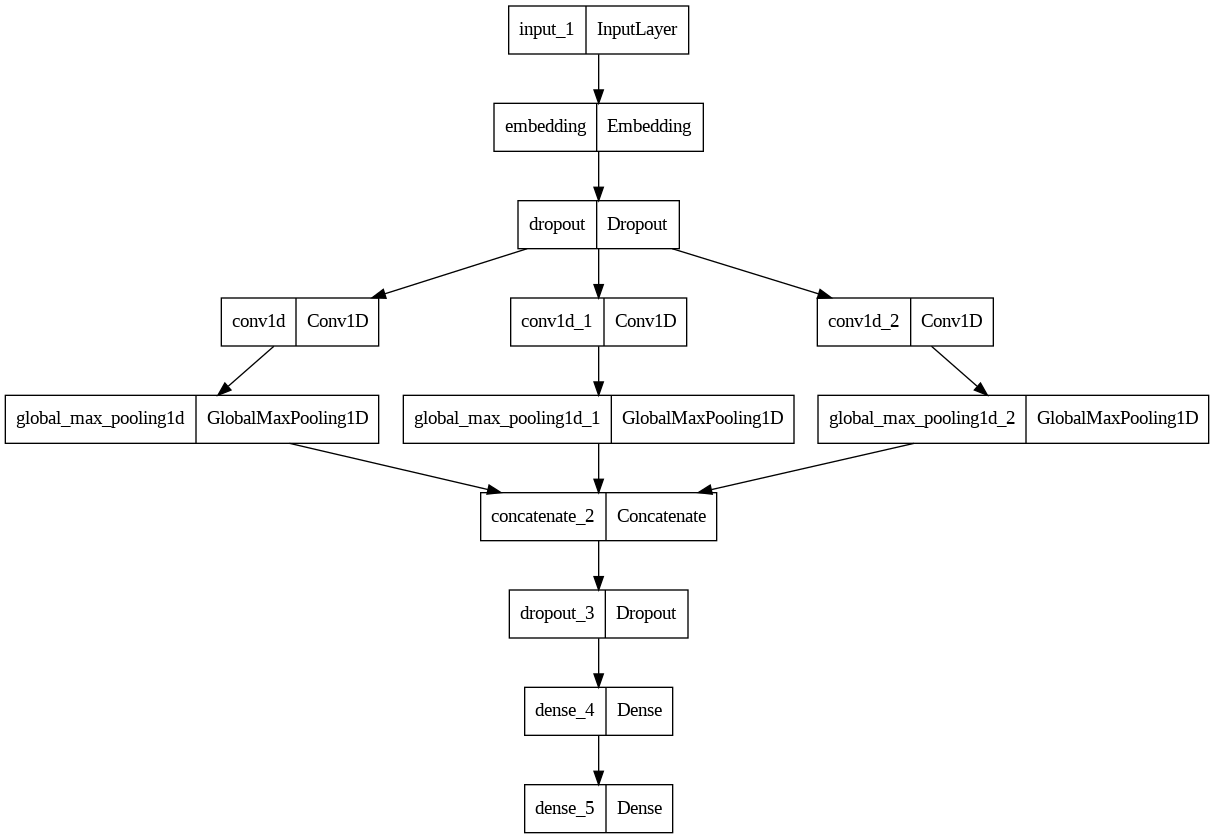

In [53]:
tf.keras.utils.plot_model(
    model,
    to_file='CNN_model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)